In [1]:
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
data_dir = "/common/users/dm1487/arcmg_datasets/cartpole/incremental_endpoint_dataset/500_endpoint_dataset.txt"

In [3]:
with open(data_dir, "r") as f:
    data = f.readlines()

In [6]:
last_states = np.array([[float(x.strip()) for x in line.split(' ')[-4:]] for line in data])

last_states[:, 1] = last_states[:, 1] % (2 * np.pi)

In [7]:
# Inspect the last_states array
print(f"Shape of last_states: {last_states.shape}")
print(f"Data type: {last_states.dtype}")
print(f"Min values per dimension: {np.min(last_states, axis=0)}")
print(f"Max values per dimension: {np.max(last_states, axis=0)}")
print(f"Mean values per dimension: {np.mean(last_states, axis=0)}")
print(f"Std values per dimension: {np.std(last_states, axis=0)}")
print(f"\nFirst 5 rows:")
print(last_states[:5])


Shape of last_states: (499506, 4)
Data type: float64
Min values per dimension: [-1.87354122e+00  2.38175528e-08 -4.15462728e+00 -1.33272963e+01]
Max values per dimension: [ 1.86327096  6.28318524  4.12003376 13.99971195]
Mean values per dimension: [-0.08160537  3.22938425 -0.06401999 -0.12711552]
Std values per dimension: [1.07136854 1.42858335 1.24711553 3.33637103]

First 5 rows:
[[ 0.91855069  3.5615885  -1.03726051 -2.59135779]
 [ 0.91855069  3.5615885  -1.03726051 -2.59135779]
 [ 0.91855069  3.5615885  -1.03726051 -2.59135779]
 [ 0.91855069  3.5615885  -1.03726051 -2.59135779]
 [ 0.91855069  3.5615885  -1.03726051 -2.59135779]]


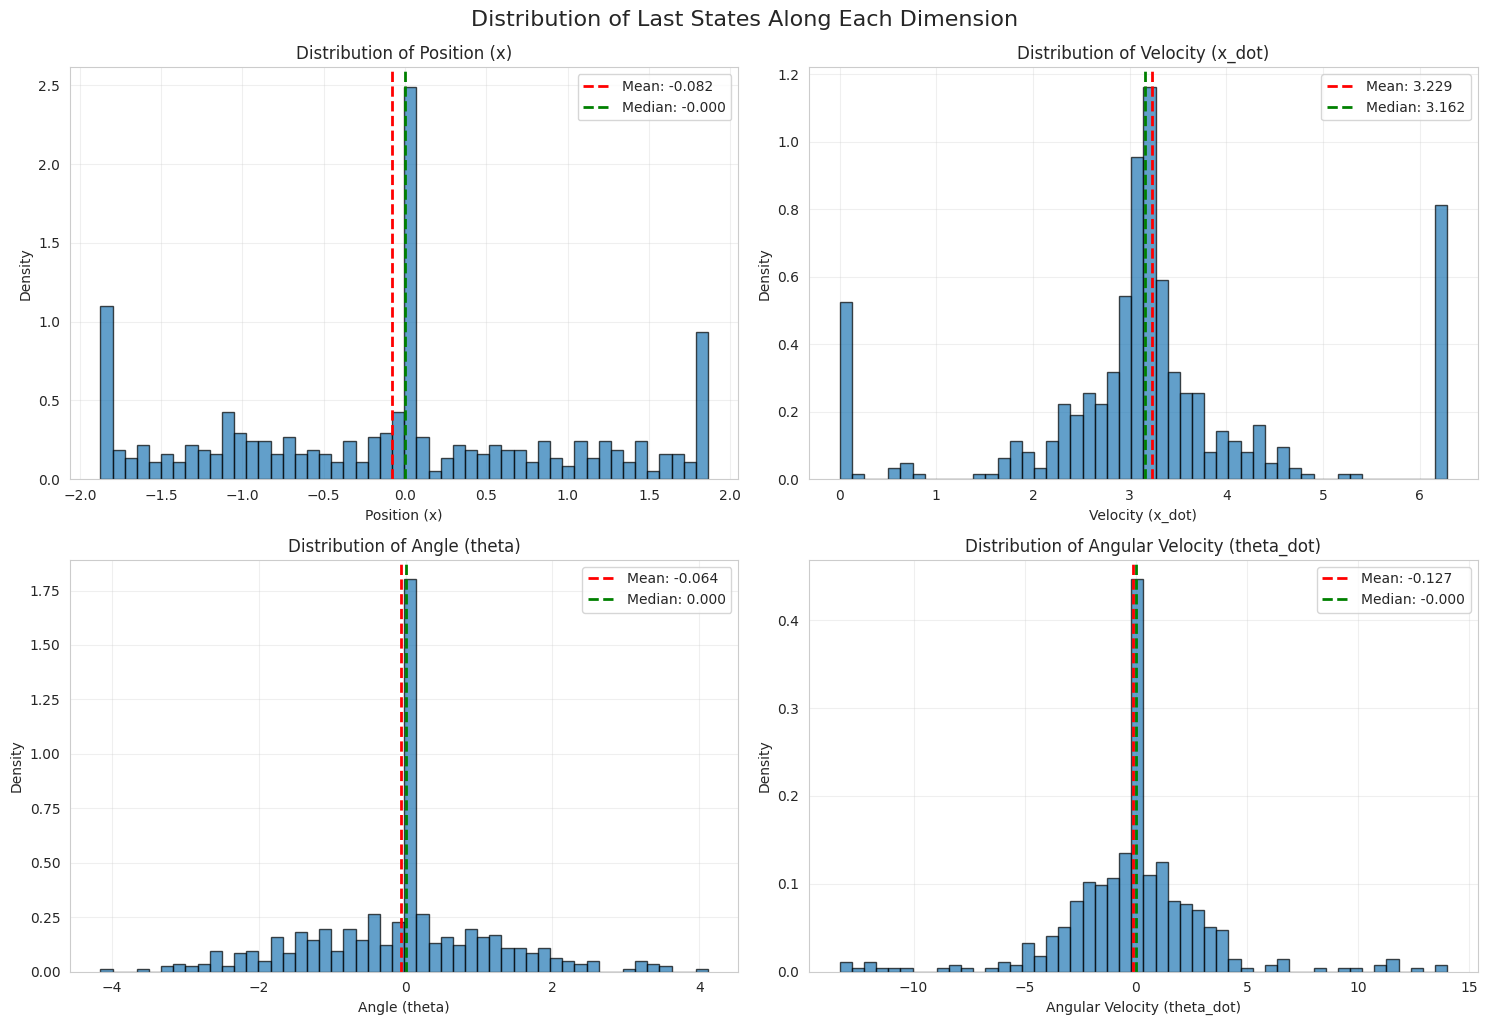

In [8]:
# Create distribution plots for each dimension
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Dimension labels (assuming cartpole states: x, x_dot, theta, theta_dot)
dim_labels = ['Position (x)', 'Velocity (x_dot)', 'Angle (theta)', 'Angular Velocity (theta_dot)']

for i in range(4):
    # Histogram
    
    axes[i].hist(last_states[:, i], bins=50, alpha=0.7, density=True, edgecolor='black')
    
    # Add vertical lines for mean and median
    
    mean_val = np.mean(last_states[:, i])
    median_val = np.median(last_states[:, i])
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.3f}')
    axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.3f}')
    
    axes[i].set_title(f'Distribution of {dim_labels[i]}', fontsize=12)
    axes[i].set_xlabel(dim_labels[i])
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Distribution of Last States Along Each Dimension', fontsize=16, y=1.02)
plt.show()


/tmp/ipykernel_2153198/242096726.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax1.boxplot(data_for_box, labels=dim_labels, patch_artist=True)


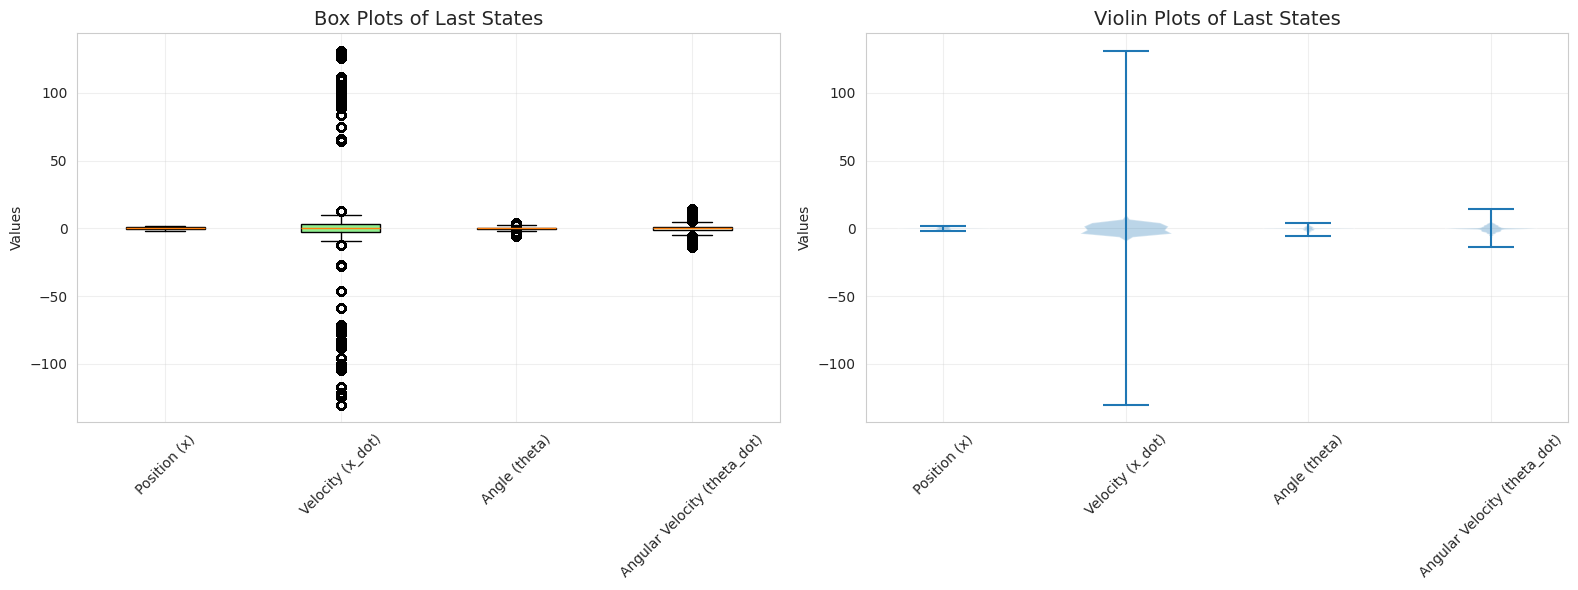

In [49]:
# Additional distribution visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Box plots
data_for_box = [last_states[:, i] for i in range(4)]
box_plot = ax1.boxplot(data_for_box, labels=dim_labels, patch_artist=True)
ax1.set_title('Box Plots of Last States', fontsize=14)
ax1.set_ylabel('Values')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Color the box plots
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

# Violin plots
positions = range(1, 5)
violin_parts = ax2.violinplot(data_for_box, positions=positions)
ax2.set_title('Violin Plots of Last States', fontsize=14)
ax2.set_ylabel('Values')
ax2.set_xticks(positions)
ax2.set_xticklabels(dim_labels, rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


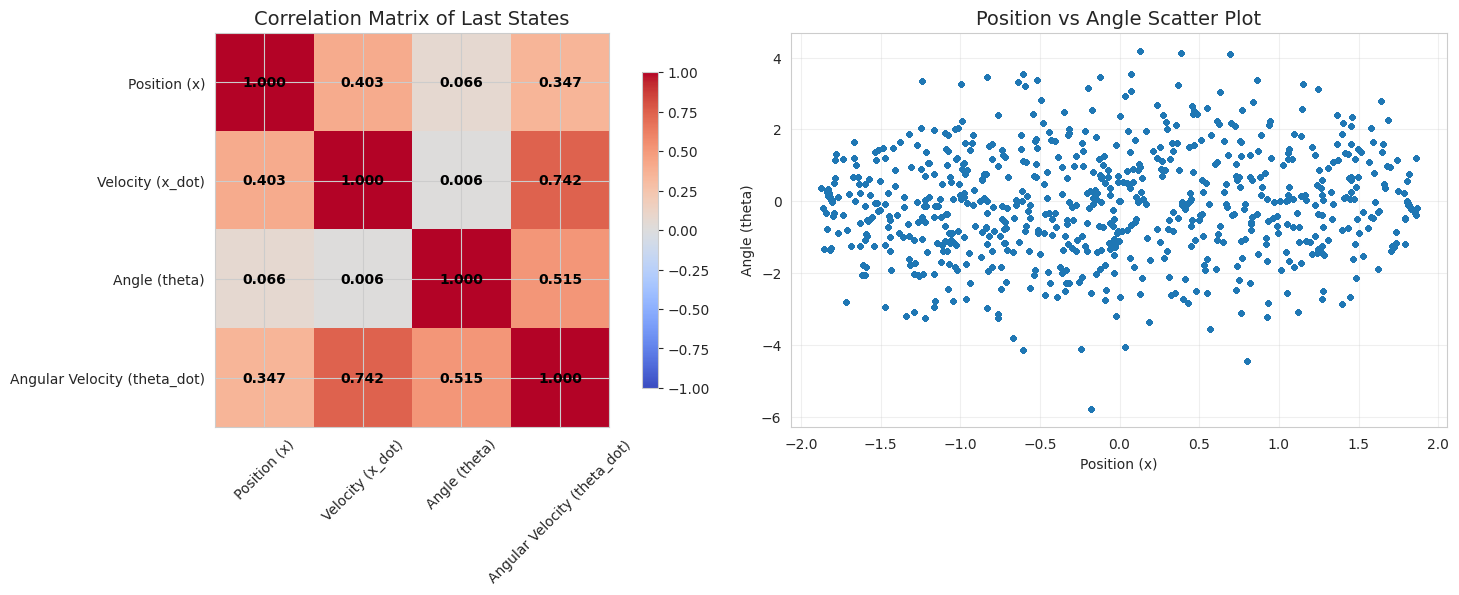

In [50]:
# Correlation analysis and detailed statistics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Correlation heatmap
correlation_matrix = np.corrcoef(last_states.T)
im = ax1.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
ax1.set_title('Correlation Matrix of Last States', fontsize=14)
ax1.set_xticks(range(4))
ax1.set_yticks(range(4))
ax1.set_xticklabels(dim_labels, rotation=45)
ax1.set_yticklabels(dim_labels)

# Add correlation values to heatmap
for i in range(4):
    for j in range(4):
        text = ax1.text(j, i, f'{correlation_matrix[i, j]:.3f}',
                       ha="center", va="center", color="black", fontweight='bold')

plt.colorbar(im, ax=ax1, shrink=0.8)

# Pairwise scatter plot (just showing two most interesting pairs)
ax2.scatter(last_states[:, 0], last_states[:, 2], alpha=0.5, s=10)
ax2.set_xlabel(dim_labels[0])
ax2.set_ylabel(dim_labels[2])
ax2.set_title('Position vs Angle Scatter Plot', fontsize=14)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [51]:
# Detailed summary statistics
import pandas as pd

# Create a DataFrame for easier analysis
df = pd.DataFrame(last_states, columns=dim_labels)

# Display comprehensive statistics
print("=== SUMMARY STATISTICS ===")
print(df.describe())

print("\n=== ADDITIONAL STATISTICS ===")
for i, label in enumerate(dim_labels):
    data = last_states[:, i]
    print(f"\n{label}:")
    print(f"  Range: [{np.min(data):.4f}, {np.max(data):.4f}]")
    print(f"  IQR: {np.percentile(data, 75) - np.percentile(data, 25):.4f}")
    print(f"  Skewness: {pd.Series(data).skew():.4f}")
    print(f"  Kurtosis: {pd.Series(data).kurtosis():.4f}")
    print(f"  % within 1 std: {np.mean(np.abs(data - np.mean(data)) <= np.std(data)) * 100:.1f}%")
    print(f"  % within 2 std: {np.mean(np.abs(data - np.mean(data)) <= 2*np.std(data)) * 100:.1f}%")


=== SUMMARY STATISTICS ===
        Position (x)  Velocity (x_dot)  Angle (theta)  \
count  999020.000000      9.990200e+05  999020.000000   
mean       -0.025943      4.637107e-01      -0.053678   
std         1.057089      2.373115e+01       1.263234   
min        -1.873541     -1.302020e+02      -5.801540   
25%        -0.830883     -3.082318e+00      -0.637091   
50%        -0.000004     -1.497091e-07      -0.000003   
75%         0.749312      3.063917e+00       0.471080   
max         1.865284      1.308240e+02       4.191495   

       Angular Velocity (theta_dot)  
count                  9.990200e+05  
mean                  -7.173606e-02  
std                    3.525870e+00  
min                   -1.363952e+01  
25%                   -1.463361e+00  
50%                   -1.734198e-07  
75%                    1.104049e+00  
max                    1.399971e+01  

=== ADDITIONAL STATISTICS ===

Position (x):
  Range: [-1.8735, 1.8653]
  IQR: 1.5802
  Skewness: 0.0671
  Kurtosis:

In [52]:
last_states[:, 0]

array([ 9.18550694e-01,  9.18550694e-01,  9.18550694e-01, ...,
       -1.30627296e-05, -1.30627296e-05, -1.30627296e-05], shape=(999020,))